In [1]:
# 1_plot_immune_composition_T21_vs_2n

In [23]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scanpy as sc
import pathlib as pt
import numpy as np
import gseapy as gp
import sys
import os
import seaborn as sns
sns.set_style({'axes.grid' : False})

import warnings
warnings.filterwarnings('ignore')

import sys
scr_path = '/nfs/team292/hm11/endo_GLND/starsolo/GLND/Thyroid/snippets'
sys.path.append(scr_path)
import singleCellFun as sf

f,_ = sf.makeOutoutFolders()
sf.nbInit(f)

pd.set_option('display.max_columns', 100)
# Define our base directory for the analysis
# os.chdir('/home/jovyan/cpdb_tutorial')
print(sys.version)

3.10.1 | packaged by conda-forge | (main, Dec 22 2021, 01:39:36) [GCC 9.4.0]


In [8]:
# Read DGE output (analysis done by Mi)
df = pd.read_csv('../data/immune_composition_T21_vs_2n.csv', index_col=0)
df

,donor,karyotype,age_group,celltype,cluster,nCell,total_imm_cell,frac
1,Hrv116,2n,11-13,B_cells,B_cells,15,389,0.038560
2,Hrv116,2n,11-13,Cycling_NK_cells,NK_cells,1,389,0.002571
3,Hrv116,2n,11-13,Cycling_T,T_cells,71,389,0.182519
4,Hrv116,2n,11-13,DC2,Myeloid,20,389,0.051414
5,Hrv116,2n,11-13,ILC,ILCs,8,389,0.020566
...,...,...,...,...,...,...,...,...
266,Srv10,2n,14-20,NK_cells,NK_cells,107,762,0.140420
267,Srv10,2n,14-20,PDC/DC1,Myeloid,9,762,0.011811
268,Srv10,2n,14-20,PreB_cells,B_cells,5,762,0.006562
269,Srv10,2n,14-20,T_cells,T_cells,126,762,0.165354


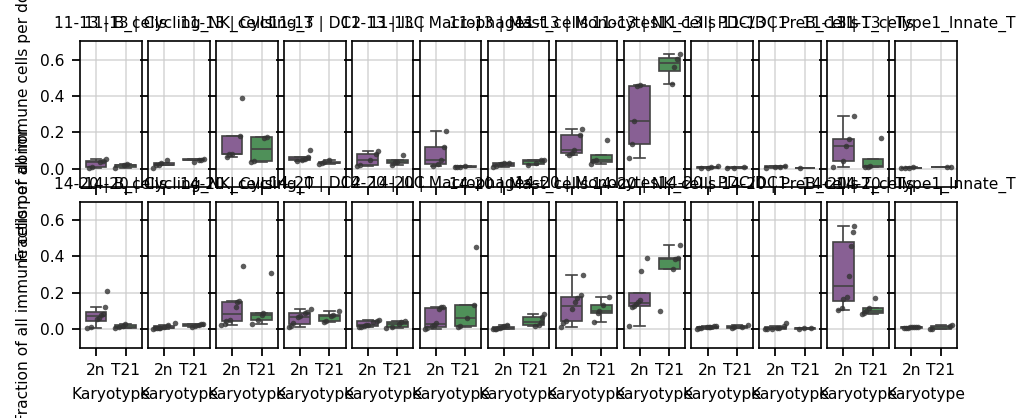

In [91]:
g = sns.catplot(data=df, x="karyotype", y="frac", kind="box", hue="karyotype", palette={"2n": "#8D579D", "T21": "#449B52"},   # apply custom colors
    col="celltype", row="age_group", sharex=True, sharey=True, height=1.4, aspect=0.35, width=0.7,
    showfliers=False, facet_kws={'despine':False}, linewidth=0.75, whiskerprops={'linewidth':0.75}
)

g.map_dataframe(sns.stripplot, x="karyotype", y="frac", 
                hue="frac", palette=["0.2"], alpha=0.8, dodge=True, size=2.5, legend=True)

g.set(ylim=(-0.1, np.ceil(df['frac'].max() * 10) / 10))
g.set(yticks=[0, 0.2, 0.4, 0.6])

# Add grid lines
for ax in g.axes.flatten():
    ax.grid(True, which="major", axis="both", linestyle="-", alpha=0.7)
    # Force all 4 spines visible
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.75)
        spine.set_color("black")

# Explicit font size for labels & titles
g.set_axis_labels("Karyotype", "Fraction of all immune cells per donor", fontsize=7)
g.set_titles(row_template="{row_name}", col_template="{col_name}", size=7)

# Tick labels font size
for ax in g.axes.flatten():
    ax.tick_params(axis="both", labelsize=7)

# Add x-axis margins to all facets
for ax in g.axes.flatten():
    ax.margins(x=0.1)  # 10% margin on left and right

# plt.tight_layout()
g.figure.subplots_adjust(wspace=.1, hspace=.1)
# plt.show()
plt.savefig('figures/T21_vs_2n_immune_composition.pdf', dpi=300)